In [111]:
import pandas as pd
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt
import os
import glob
from functools import partial
import seaborn as sns

plt.style.use('ggplot')

### Import cleaned CSVs to `pd.df`
- adv_df = advanced stats per season from 1985-2019
- szn_df = season average stats from 1985-2019
- lbj_df = LeBron James regular season stats by game from 2003-2019
- mj_df = Michael Jordan regular season stats by game from 1985 - 2002 (minus retirement years)
    - (retirement years: '94, '99-'01)
- lbjp_df = LeBron James post season stats per game
- mjp_df = Michael Jordan post season stats per game

In [101]:
adv_df = pd.read_csv("data/final_adv_data_cleaned.csv")
szn_df = pd.read_csv("data/final_szn_data_cleaned.csv")
lbj_df = pd.read_csv("data/final_lbj_comb_szn_stats.csv")
mj_df = pd.read_csv("data/final_mj_comb_szn_stats.csv")
lbjp_df = pd.read_csv("data/final_lbj_ps_cleaned.csv")
mjp_df = pd.read_csv("data/final_mj_ps_cleaned.csv")

## Using Advanced Stats

In [109]:
#lbj and mj advanced stats from adv_df

lbj_adv = adv_df[adv_df["Player"].str.contains("LeBron James")]
mj_adv = adv_df[adv_df["Player"].str.contains("Michael Jordan")]
SF_adv = adv_df[adv_df["Pos"].str.contains("SF")]
SG_adv = adv_df[adv_df["Pos"].str.contains("SG")]

#### Lebron James and Michael Jordan have a very similar career PER, though Jordan's is higher by 0.15. 

- Lebron's PER shows a standard deviation that is about 0.66 less, which shows Lebron has been more consistent. 
- Lebron's PER std may increase if his production drops as he nears retirement.

LBJ avg PER count    32.000000
mean     27.625000
std       3.293297
min      18.300000
25%      25.850000
50%      27.800000
75%      29.650000
max      31.700000
Name: PER, dtype: float64

MJ avg PER count    26.000000
mean     27.769231
std       3.956642
min      19.300000
25%      25.800000
50%      29.400000
75%      31.100000
max      31.700000
Name: PER, dtype: float64


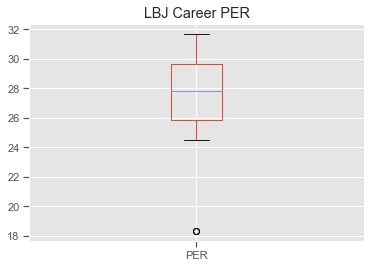

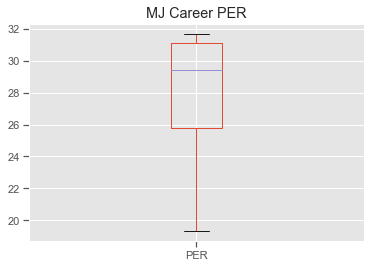

In [165]:
print("LBJ avg PER", lbj_adv["PER"].describe())
print()
print("MJ avg PER", mj_adv["PER"].describe())
lbj_adv.plot(y="PER", kind="box", title="LBJ Career PER")
mj_adv.plot(y="PER", kind="box", title="MJ Career PER")

LBJ avg BPM count    32.000000
mean      8.956250
std       2.561997
min       1.700000
25%       8.075000
50%       8.750000
75%      10.900000
max      13.200000
Name: BPM, dtype: float64

MJ avg BPM count    26.000000
mean      9.092308
std       3.398461
min       1.700000
25%       7.300000
50%      10.500000
75%      11.200000
max      13.000000
Name: BPM, dtype: float64


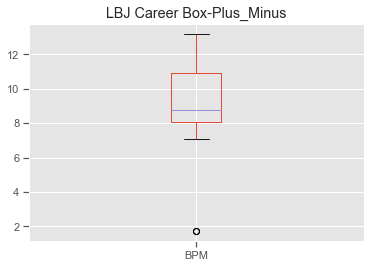

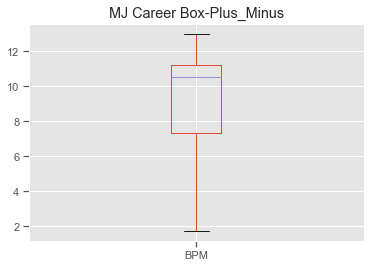

In [150]:
lbj_adv.plot(y="BPM", kind="box", title="LBJ Career Box-Plus_Minus")
mj_adv.plot(y="BPM", kind="box", title="MJ Career Box-Plus_Minus")
print("LBJ avg BPM", lbj_adv["BPM"].describe())
print()
print("MJ avg BPM", mj_adv["BPM"].describe())

LBJ avg WS count    32.00000
mean     14.17500
std       3.94028
min       5.10000
25%      13.42500
50%      14.40000
75%      16.00000
max      20.30000
Name: WS, dtype: float64

MJ avg WS count    26.000000
mean     16.161538
std       5.365003
min       3.300000
25%      15.800000
50%      17.700000
75%      19.800000
max      21.200000
Name: WS, dtype: float64


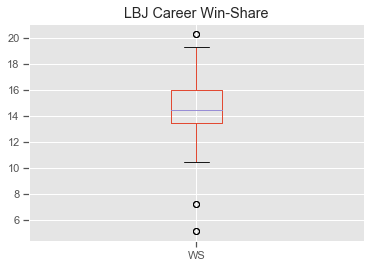

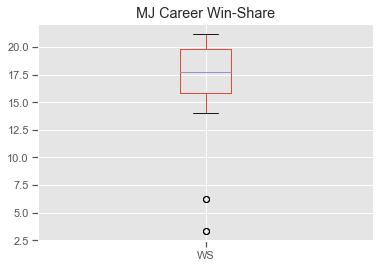

In [151]:
lbj_adv.plot(y="WS", kind="box", title="LBJ Career Win-Share")
mj_adv.plot(y="WS", kind="box", title="MJ Career Win-Share")
print("LBJ avg WS", lbj_adv["WS"].describe())
print()
print("MJ avg WS", mj_adv["WS"].describe())

In [153]:
lbj_mj_adv = pd.concat([lbj_adv, mj_adv])

In [164]:
lbj_mj_adv.plot(x="Player", y="WS", kind="scatter")

ValueError: scatter requires x column to be numeric

## Using Advanced Stats data

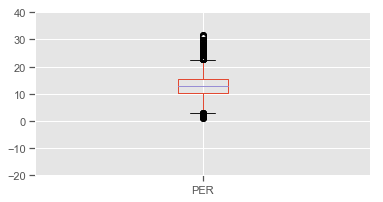

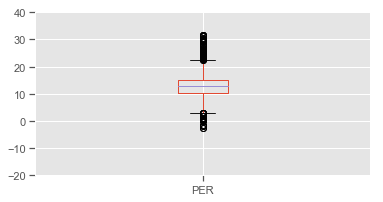

In [119]:
SF_adv.plot(x="Year", y="PER", kind="box", figsize=(6,3), ylim=(-20,40))
SG_adv.plot(x="Year", y="PER", kind="box", figsize=(6,3), ylim=(-20,40))

In [106]:
adv_df.head(5)

,Unnamed: 0,Rk,Player,Pos,Age,Tm,G,PER,TS%,TRB%,...,BLK%,TOV%,USG%,OWS,DWS,WS,WS/48,BPM,VORP,Year
0,0,1,Mahmoud Abdul-Rauf,PG,28.0,SAC,31.0,10.5,0.405,3.9,...,0.1,6.4,25.1,-0.5,0.2,-0.3,-0.025,-4.6,-0.4,1998
1,1,2,Tariq Abdul-Wahad,SG,23.0,SAC,59.0,10.1,0.456,6.7,...,0.9,13.6,22.1,-0.8,0.6,-0.2,-0.008,-4.8,-0.7,1998
2,2,3,Shareef Abdur-Rahim,SF,21.0,VAN,82.0,21.1,0.562,11.3,...,1.8,13.6,28.4,6.3,0.6,6.9,0.113,1.6,2.6,1998
3,3,4,Cory Alexander,PG,24.0,TOT,60.0,15.2,0.548,6.6,...,0.6,20.1,19.8,1.0,1.2,2.2,0.081,0.4,0.8,1998
4,4,4,Cory Alexander,PG,24.0,SAS,37.0,11.1,0.512,5.4,...,0.7,22.6,19.5,-0.2,0.8,0.7,0.065,-1.3,0.1,1998


### Delete Rows for Players who played less than 20 games in a season

In [107]:
adv_df = adv_df[adv_df["G"] > 20]

In [185]:
adv_500 = adv_df.sort_values(by="PER", ascending=False).head(5000)

In [176]:
adv_500

,Unnamed: 0,Rk,Player,Pos,Age,Tm,G,PER,TS%,TRB%,...,BLK%,TOV%,USG%,OWS,DWS,WS,WS/48,BPM,VORP,Year
11317,11759,146,Michael Jordan*,SG,24.0,CHI,82.0,31.7,0.603,7.8,...,2.4,9.6,34.1,15.2,6.1,21.2,0.308,13.0,12.5,1988
20854,21670,208,LeBron James,SF,24.0,CLE,81.0,31.7,0.591,11.9,...,2.4,11.0,33.8,13.7,6.5,20.3,0.318,13.2,11.8,2009
735,763,146,Michael Jordan*,SG,24.0,CHI,82.0,31.7,0.603,7.8,...,2.4,9.6,34.1,15.2,6.1,21.2,0.308,13.0,12.5,1988
10272,10674,208,LeBron James,SF,24.0,CLE,81.0,31.7,0.591,11.9,...,2.4,11.0,33.8,13.7,6.5,20.3,0.318,13.2,11.8,2009
15665,16280,212,LeBron James,PF,28.0,MIA,76.0,31.6,0.640,13.1,...,1.9,12.4,30.2,14.6,4.7,19.3,0.322,11.7,9.9,2013
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32782,34080,298,Glen Rice,SF,27.0,MIA,82.0,19.7,0.586,7.4,...,0.4,8.9,25.2,7.9,2.1,10.0,0.159,3.3,4.0,1995
15639,16253,186,J.J. Hickson,C,24.0,POR,80.0,19.7,0.591,20.7,...,1.7,14.4,19.9,4.6,2.3,6.9,0.142,0.2,1.3,2013
6537,6797,55,Carlos Boozer,PF,30.0,CHI,66.0,19.7,0.549,16.1,...,0.9,11.3,23.8,3.3,4.3,7.6,0.187,2.7,2.3,2012
4270,4438,31,Brandon Bass,PF,31.0,LAC,52.0,19.7,0.650,12.5,...,1.6,11.4,19.7,1.6,0.6,2.2,0.186,0.4,0.4,2017


<Figure size 432x288 with 0 Axes>

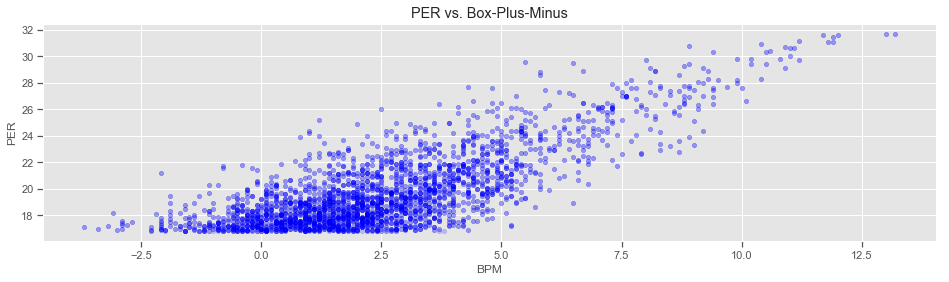

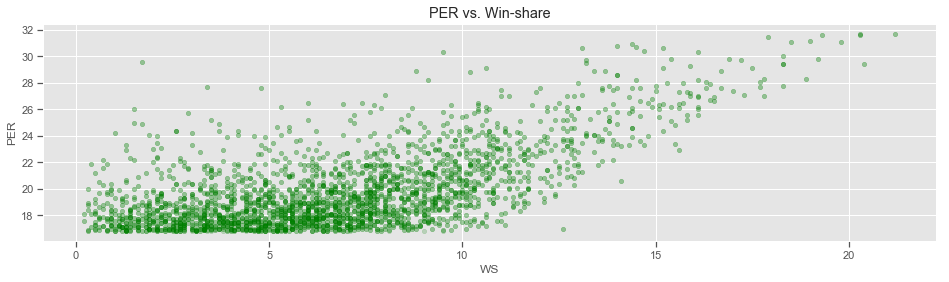

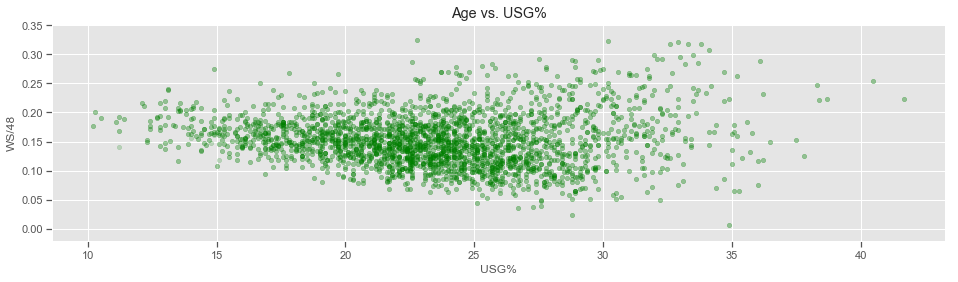

In [187]:
plt.figure()
adv_500.plot(x="BPM", y="PER", kind='scatter', figsize=(16,4), alpha=0.2, 
             color="blue", title="PER vs. Box-Plus-Minus")
adv_500.plot(x="WS", y="PER", kind='scatter', figsize=(16,4),
             alpha=0.2, color="green", title="PER vs. Win-share")
adv_500.plot(x="USG%", y="WS/48", kind='scatter', figsize=(16,4),
             alpha=0.2, color="green", title="Age vs. USG%")

In [125]:
gr_adv = adv_df.groupby(["Player", "Year"]).mean()